In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm


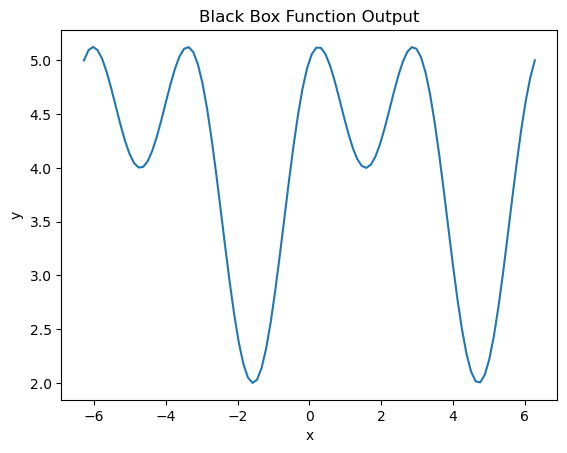

In [2]:
def black_box_function(x):
    y = np.sin(x) + np.cos(2*x) + 4
    return y

x_range = np.linspace(-2*np.pi, 2*np.pi, 100)
# print(x_range)
black_box_output = black_box_function(x_range)

plt.plot(x_range, black_box_output)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Black Box Function Output')
plt.show()

In [3]:
# random x values for sampling
num_samples = 3
sample_x = np.random.choice(x_range, size=num_samples)

# output for each sampled x value
sample_y = black_box_function(sample_x)



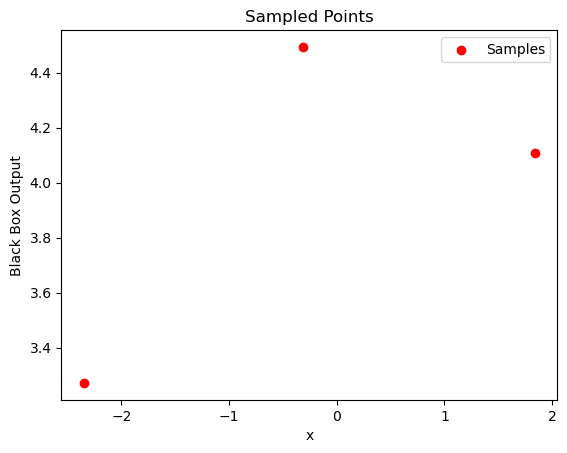

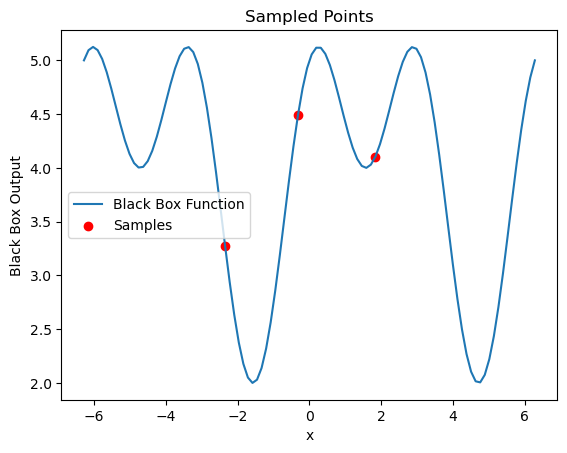

In [4]:
# plt.plot(x_range, black_box_function(x_range), label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Sampled Points')
plt.legend()
plt.show()

plt.plot(x_range, black_box_function(x_range), label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Sampled Points')
plt.legend()
plt.show()

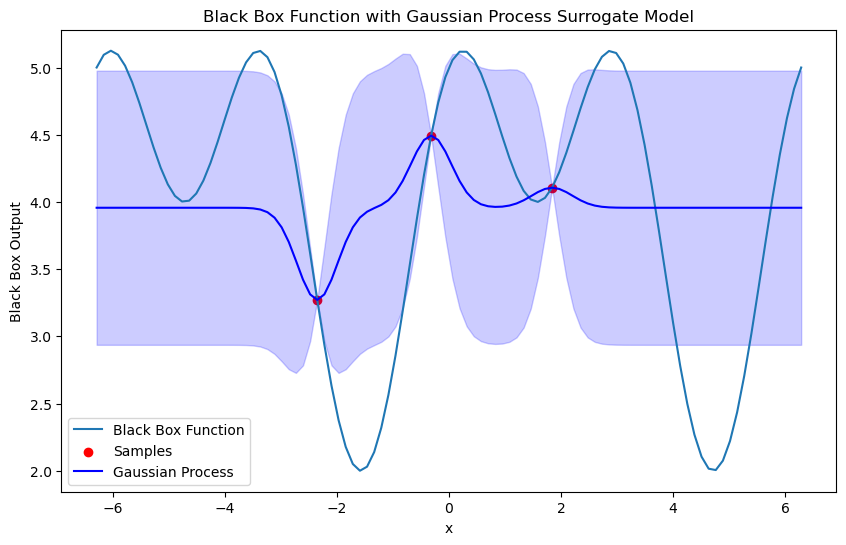

In [5]:
# Gaussian process regressor with an RBF kernel
kernel = RBF(length_scale=0.5)
gp_model = GaussianProcessRegressor(kernel=kernel, normalize_y=True)

# Fit the Gaussian process model to the sampled points
gp_model.fit(sample_x.reshape(-1, 1), sample_y)

# Generate predictions using the Gaussian process model
y_pred, y_std = gp_model.predict(x_range.reshape(-1, 1), return_std=True)
# Plot 
plt.figure(figsize=(10, 6))
plt.plot(x_range, black_box_function(x_range), label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.plot(x_range, y_pred, color='blue', label='Gaussian Process')
plt.fill_between(x_range, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Black Box Function with Gaussian Process Surrogate Model')
plt.legend()
plt.show()


In [7]:
# def expected_improvement(x, gp_model, best_y, epsilon):
#     y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
#     z = (y_pred - best_y - epsilon)/y_std
#     ei = ((y_pred - best_y - epsilon) * norm.cdf(z)) + y_std*norm.pdf(z)
#     return ei, y_pred, y_std

# best_idx = np.argmax(sample_y)
# best_x = sample_x[best_idx]
# best_y = sample_y[best_idx]

#for minimisation:
def expected_improvement(x, gp_model, best_y, epsilon):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    z = (best_y - y_pred - epsilon)/y_std
    ei = ((best_y - y_pred - epsilon) * norm.cdf(z)) + y_std*norm.pdf(z)
    return ei, y_pred, y_std

best_idx = np.argmin(sample_y)
best_x = sample_x[best_idx]
best_y = sample_y[best_idx]

ei, y_pred, y_std = expected_improvement(x_range, gp_model, best_y, 0.01)



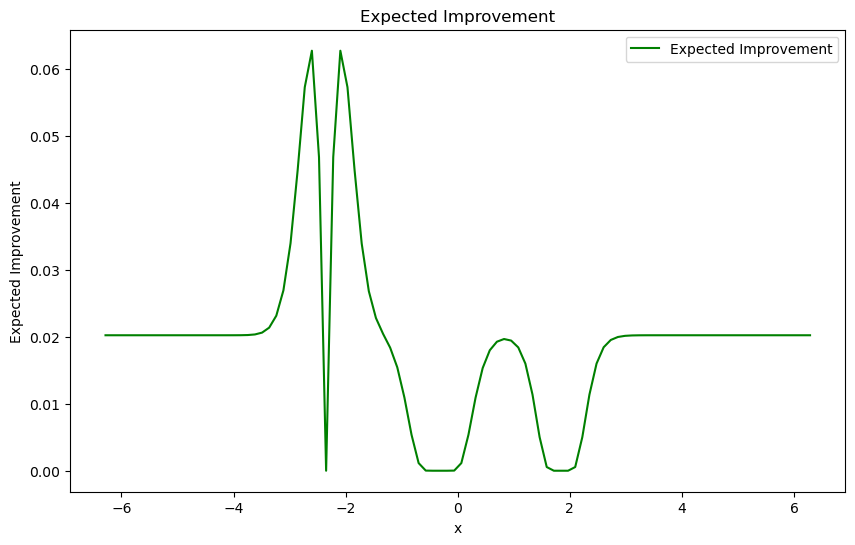

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x_range, ei, color='green', label='Expected Improvement')
plt.xlabel('x')
plt.ylabel('Expected Improvement')
plt.title('Expected Improvement')
plt.legend()
plt.show()

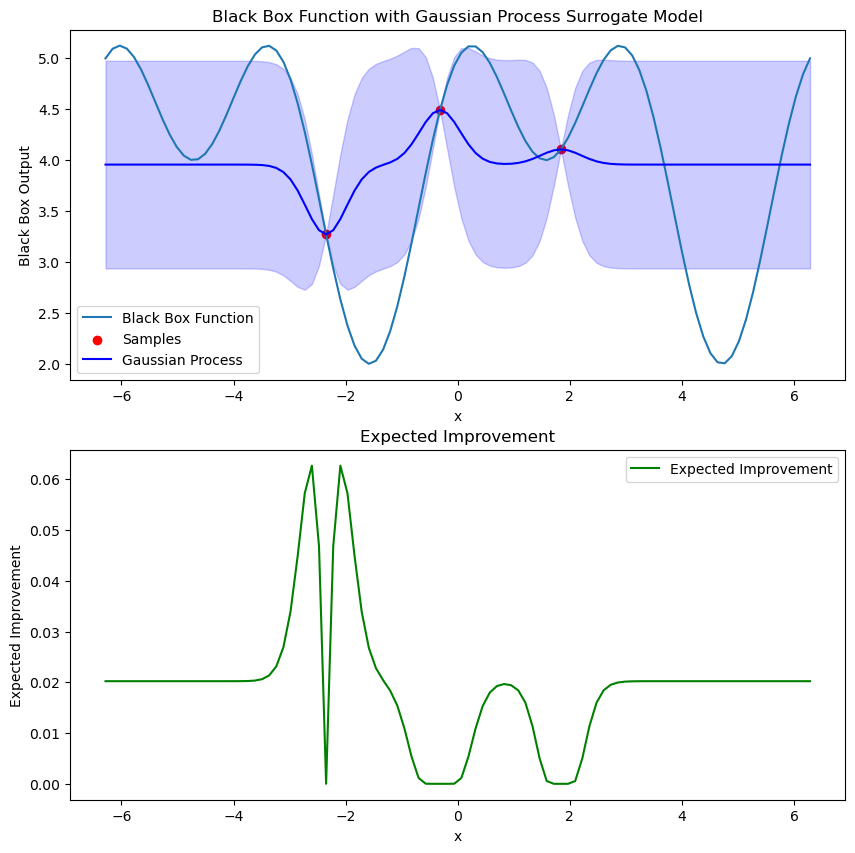

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,10))
plt.subplot(2,1,1)
# plt.figure(figsize=(10, 6))
plt.plot(x_range, black_box_function(x_range), label='Black Box Function')
plt.scatter(sample_x, sample_y, color='red', label='Samples')
plt.plot(x_range, y_pred, color='blue', label='Gaussian Process')
plt.fill_between(x_range, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
plt.xlabel('x')
plt.ylabel('Black Box Output')
plt.title('Black Box Function with Gaussian Process Surrogate Model')
plt.legend()
# plt.show()

plt.subplot(2,1,2)
plt.plot(x_range, ei, color='green', label='Expected Improvement')
plt.xlabel('x')
plt.ylabel('Expected Improvement')
plt.title('Expected Improvement')
plt.legend()
plt.show()

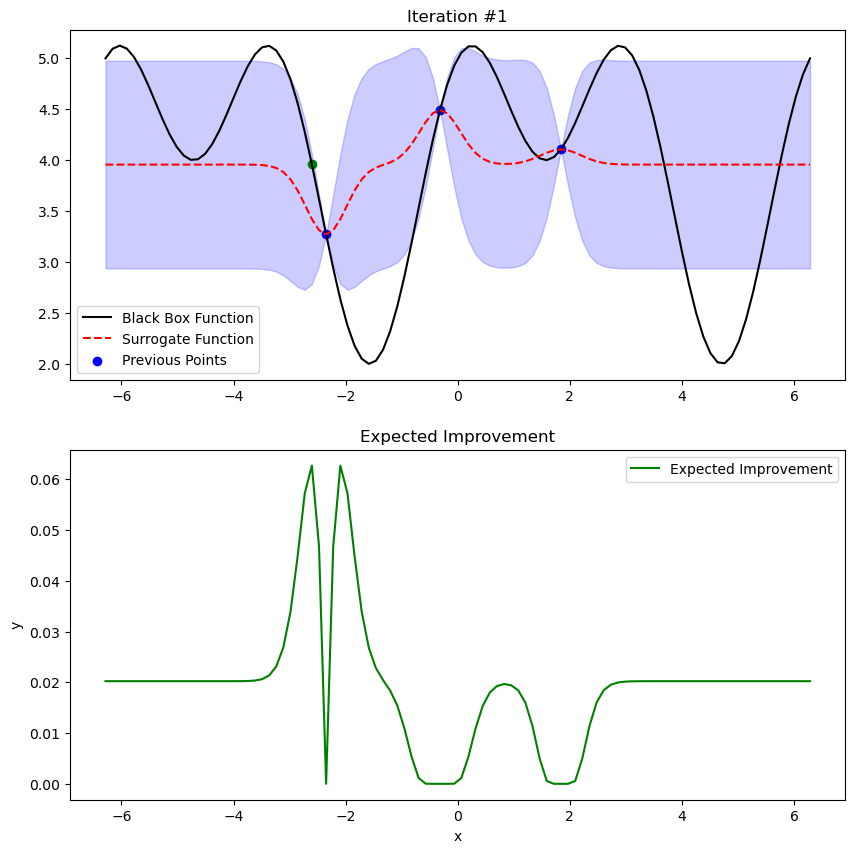

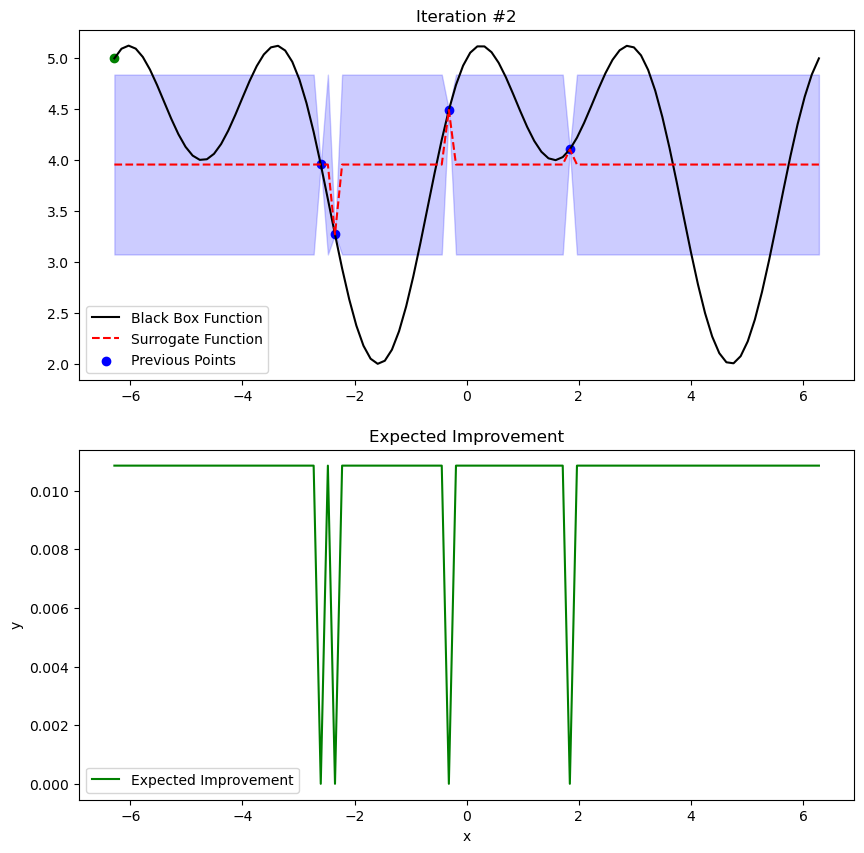

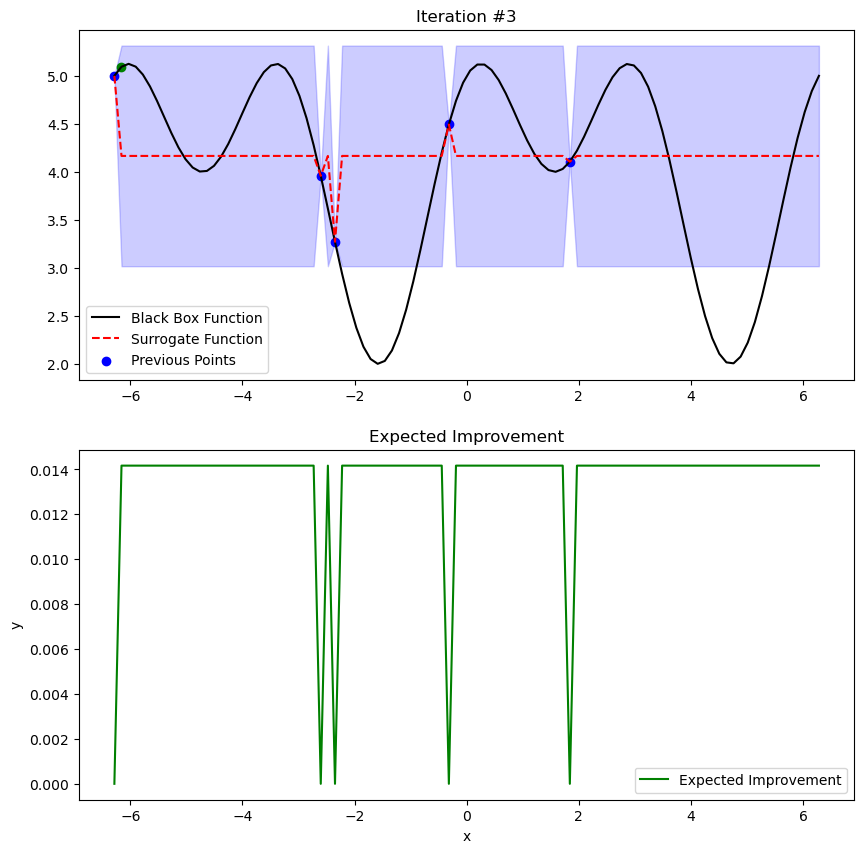

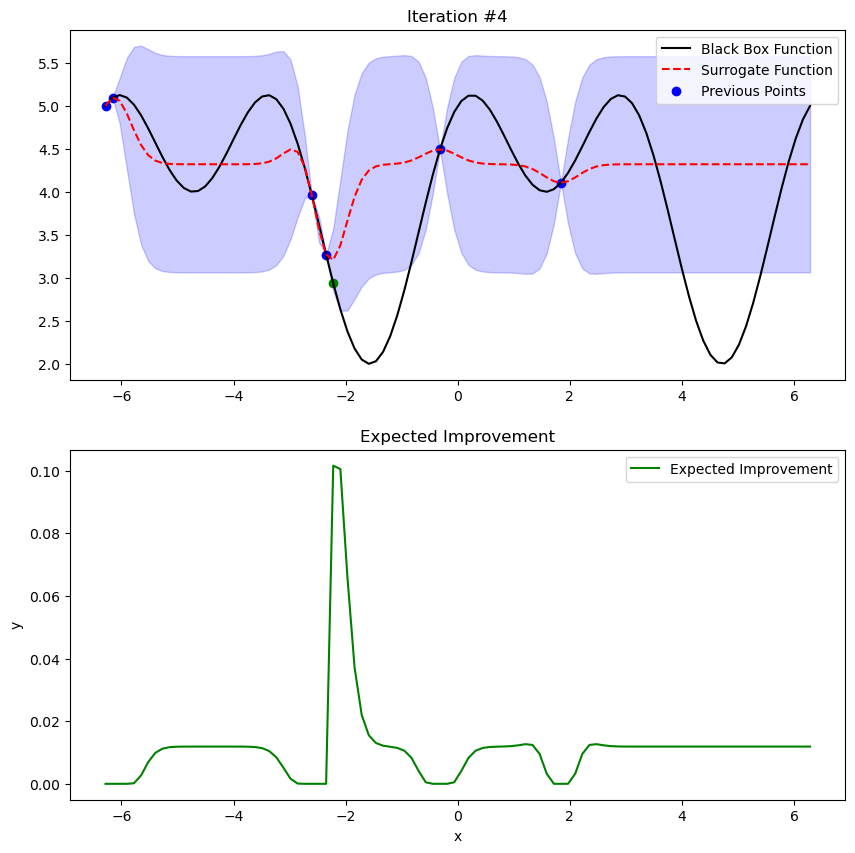

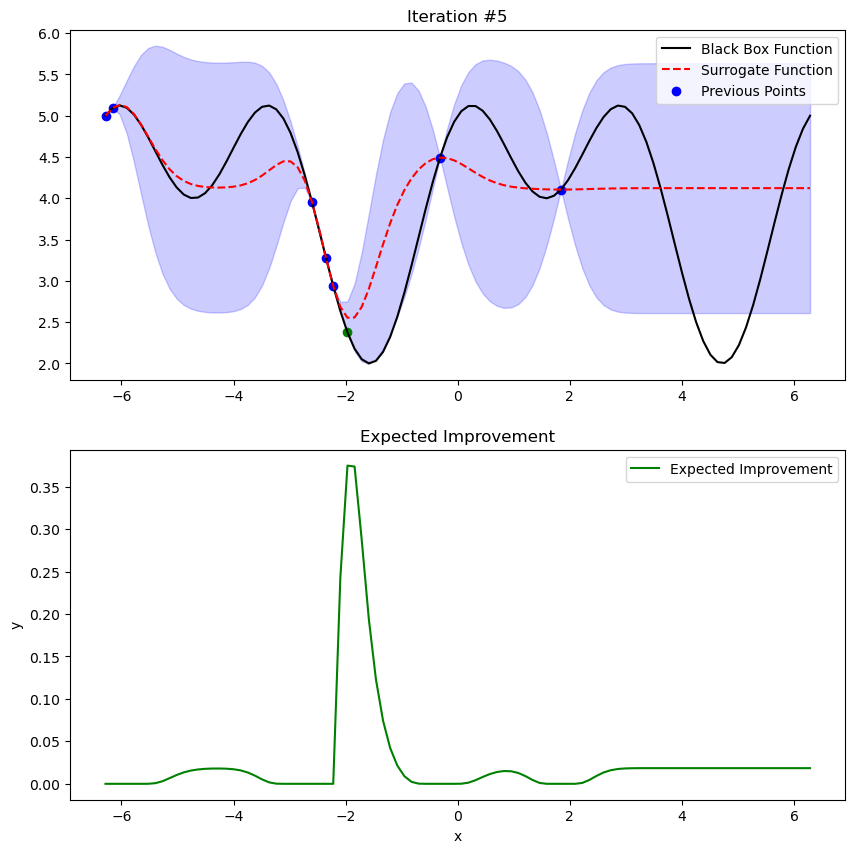

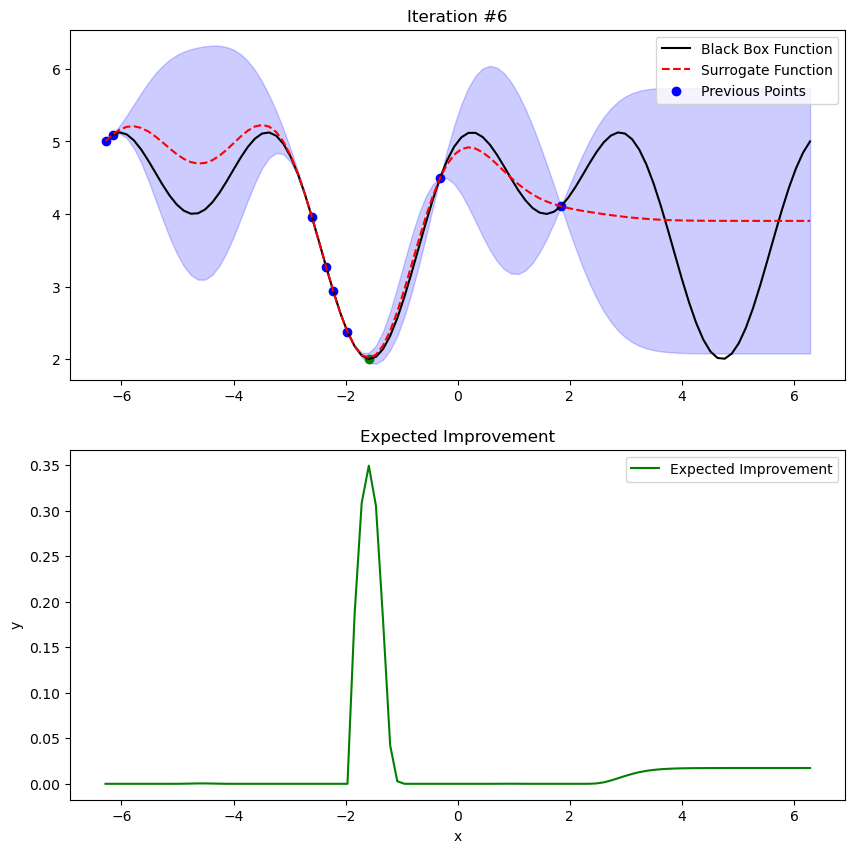

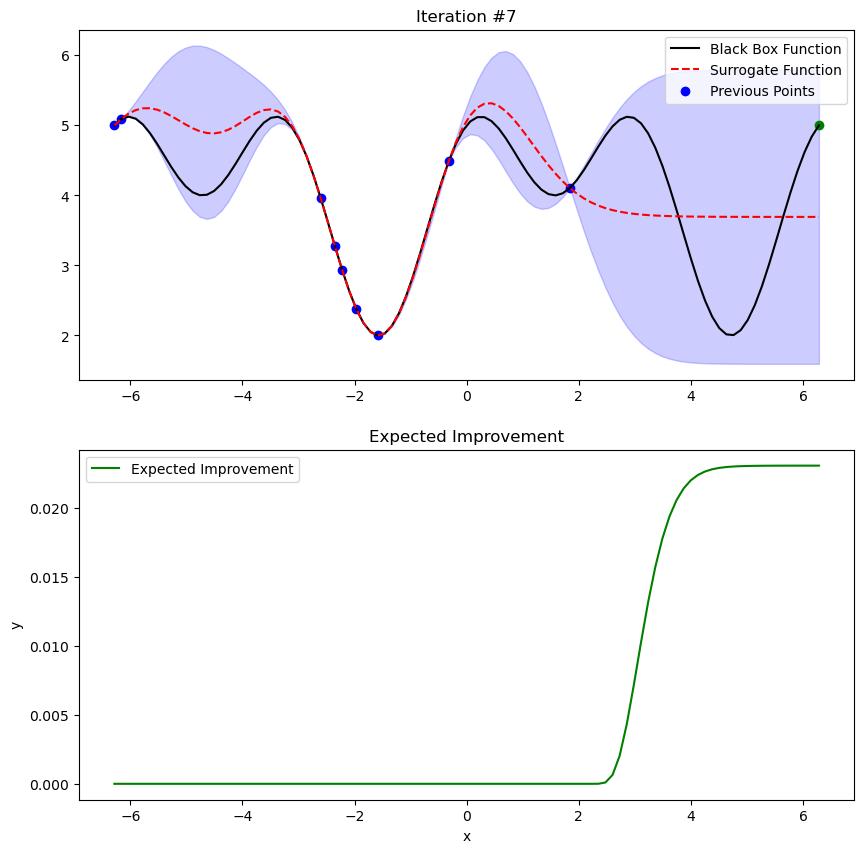

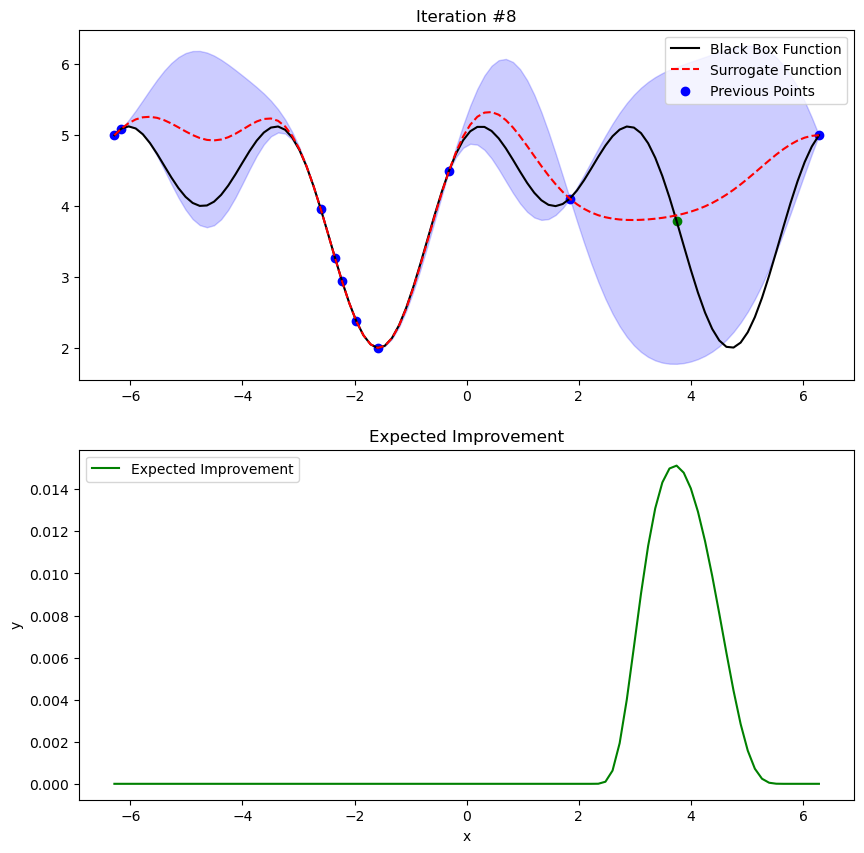

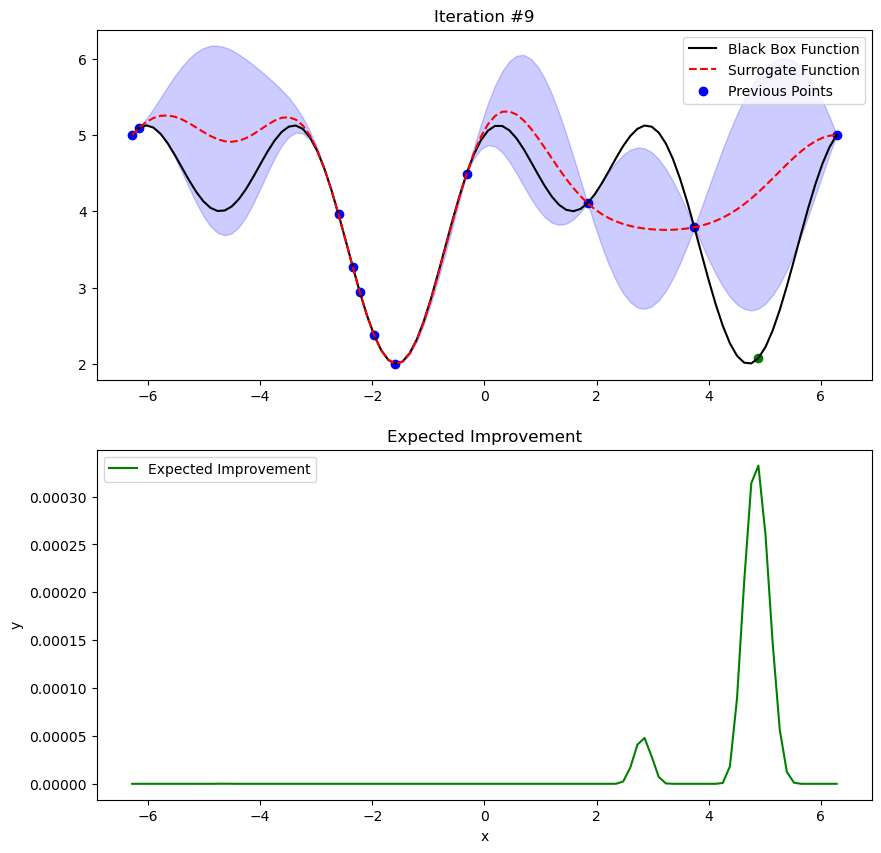

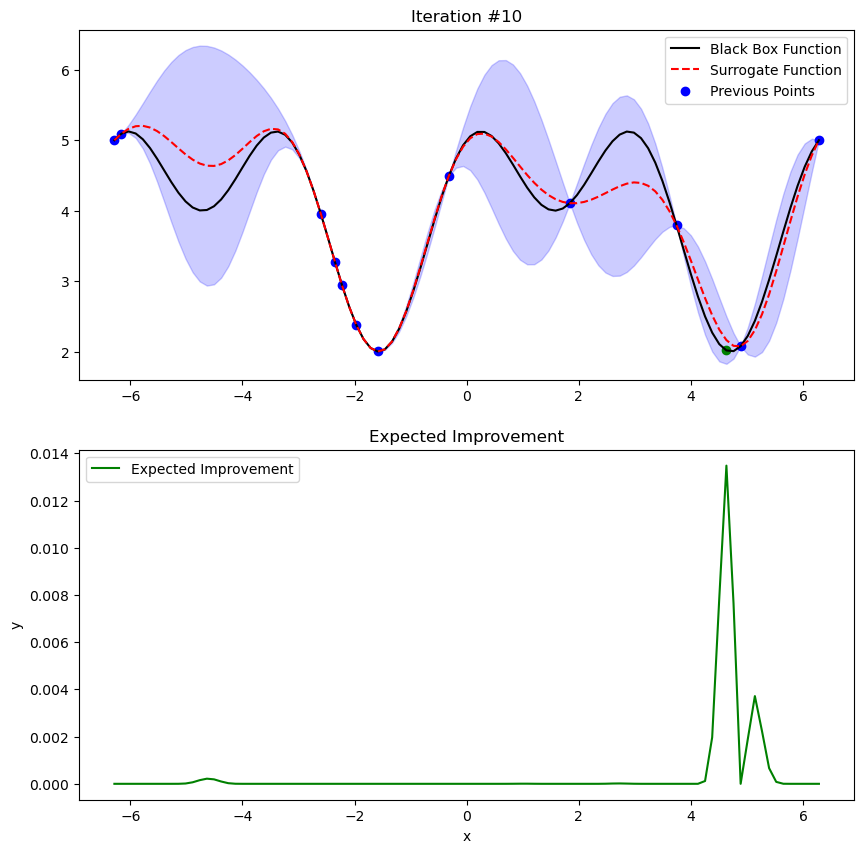

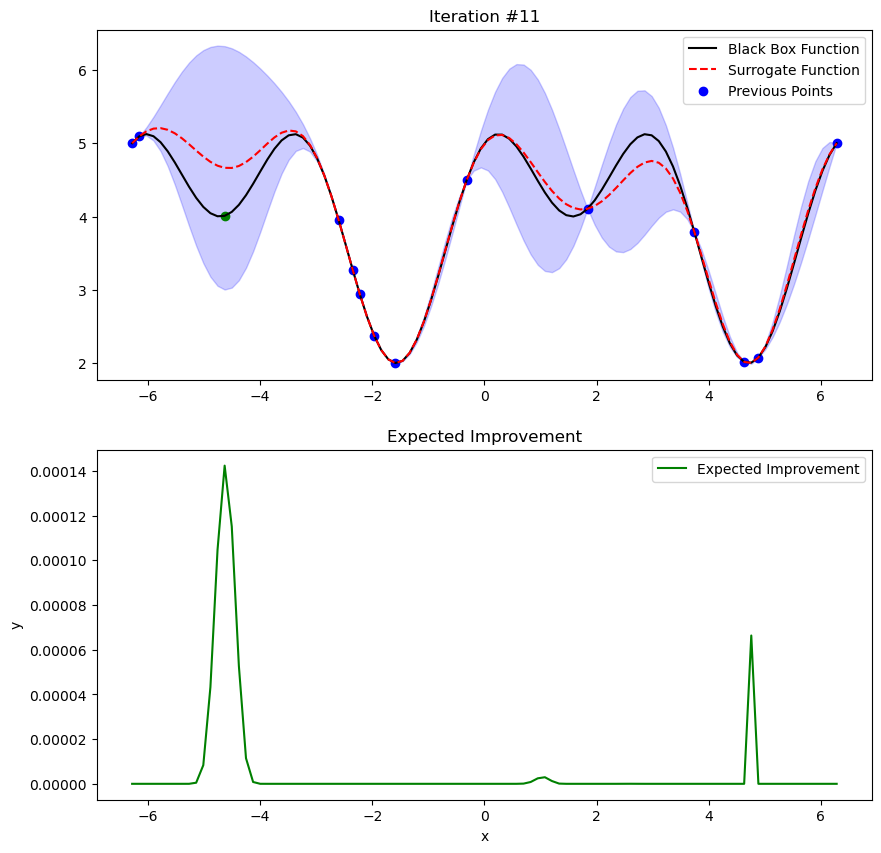

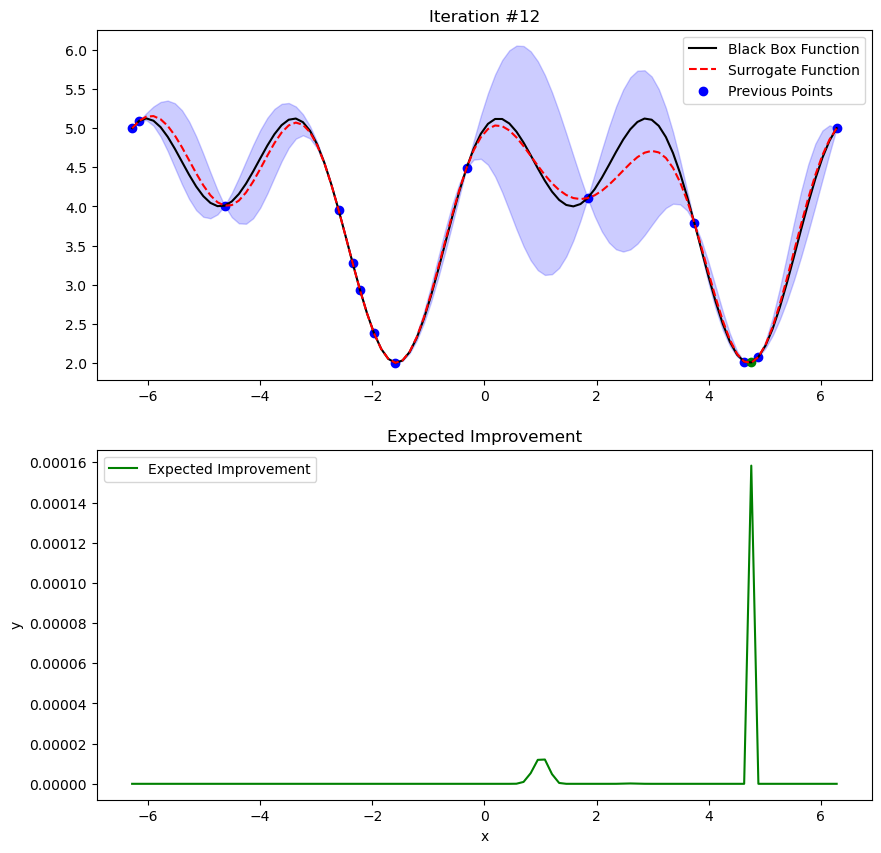

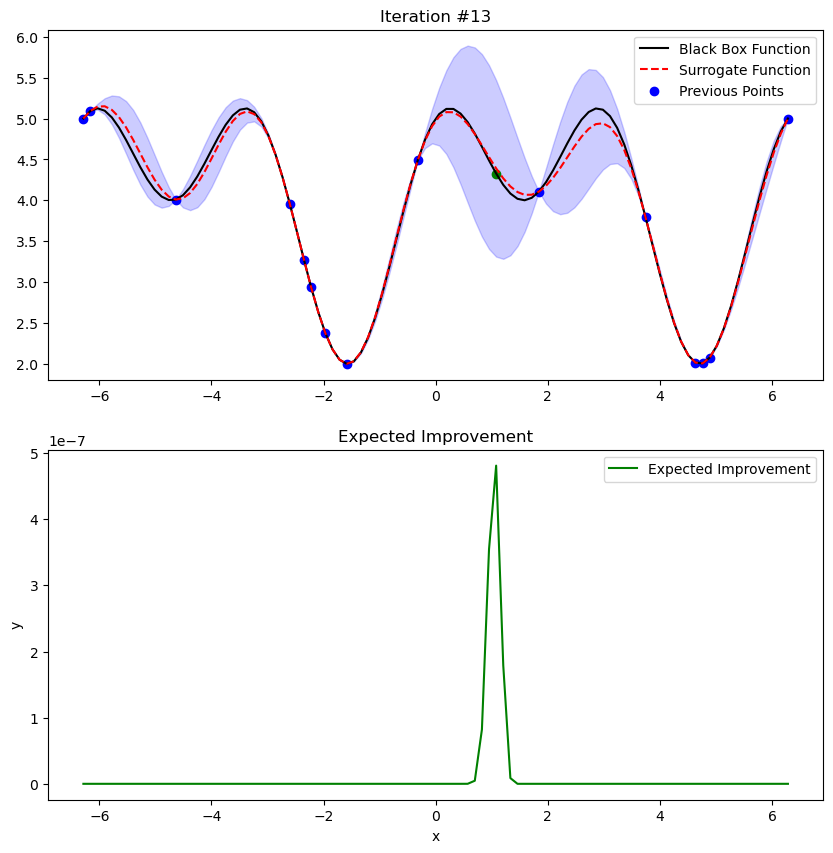

Converged!


In [10]:
iteration = 0

while np.max(ei) > 1e-5:
        iteration += 1
        # Fit the Gaussian process model to the sampled points
        gp_model.fit(sample_x.reshape(-1, 1), sample_y)

        # Determine the point with the highest observed function value
        best_idx = np.argmin(sample_y)
        best_x = sample_x[best_idx]
        best_y = sample_y[best_idx]

        # Set the value of beta for the UCB acquisition function
        beta = 2.0

        # Generate the Upper Confidence Bound (UCB) using the Gaussian process model
        ei, y_pred, y_std = expected_improvement(x_range, gp_model, best_y, 0.01)

        # Plot the black box function, surrogate function, previous points, and new points
        fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,10))
        plt.subplot(2,1,1)
        plt.plot(x_range, black_box_function(x_range), color='black', label='Black Box Function')
        plt.plot(x_range, y_pred, color='red', linestyle='dashed', label='Surrogate Function')
        plt.fill_between(x_range, y_pred - 2*y_std, y_pred + 2*y_std, color='blue', alpha=0.2)
        plt.scatter(sample_x, sample_y, color='blue', label='Previous Points')
        plt.legend()
        plt.title(f"Iteration #{iteration}")
        
        new_x = x_range[np.argmax(ei)]  # Select the next point based on ei
        new_y = black_box_function(new_x)
        sample_x = np.append(sample_x, new_x)
        sample_y = np.append(sample_y, new_y)
        plt.scatter(new_x, new_y, color='green', label='New Points')

        plt.subplot(2,1,2)
        plt.plot(x_range, ei, color='green', label='Expected Improvement')
        plt.xlabel('x')
        plt.ylabel('Expected Improvement')
        plt.title('Expected Improvement')

        # plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

print('Converged!')